# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',';')

In [3]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print("No rows: ", azdias.shape[0], "No columns: ", azdias.shape[1])

print(azdias.head())



No rows:  891221 No columns:  85
   AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3    ...            NaN     

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [5]:
# Identify missing or unknown data values and convert them to NaNs.
azdias_new = azdias

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False


#split the elements from each row of the column "missing or unknown" using comma delimitator 
#convert data that matches a missing or unknown value code into a numpy NaN value under new database name azdias_new:
for i in range(azdias_new.shape[1]):
    m=list(feat_info[feat_info['attribute']==feat_info['attribute'][i]]['missing_or_unknown'])
    m1=(m[0])
    l= [x.strip("[]") for x in m1.split(',')]
    #print(l)
    ll=l
    for j in range(len(l)):
        if isfloat(l[j]):
            ll[j]=int(l[j])
    s=azdias_new.replace({azdias_new.columns[i]: l}, {azdias_new.columns[i]: np.nan}, regex=True)
    del l, ll
    azdias_new =s





#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [6]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

missing_def=np.empty((8,azdias.shape[1]),dtype=object)
for i in range(azdias.shape[1]):
    g=azdias[azdias.loc[:,azdias.columns[i]].isin(['NaN'])]
    g_new=azdias_new[azdias_new.loc[:,azdias_new.columns[i]].isin(['NaN'])]
    missing_def[1,i]=g.shape[0] # count number of observations naturally missing
    missing_def[0,i]=azdias.columns[i]
    missing_def[3,i]=g_new.shape[0]#sum, per feature, the number of naturally missing obs with number of those labeled missing or unknown
missing_def[2,:]=missing_def[3,:]-missing_def[1,:]# count number of observations , per feature, which fit in label missing or unknown
missing_def[4,:]=azdias.shape[0]*np.ones(azdias.shape[1])#no obs per feature
missing_def[5,:]=missing_def[1,:]/missing_def[4,:]#percent of obs naturally missing
missing_def[6,:]=missing_def[2,:]/missing_def[4,:]#percent of obs labelled as missing or unknown
missing_def[7,:]=missing_def[3,:]/missing_def[4,:]#percent of obs missing 
    
    
#dataframe missing_Def_v1 shows the number and percentage of naturally missing observations and the
#observations labelled missing or unknown 
missing_def_v1=pd.DataFrame(missing_def[1:8,:])
missing_def_v1.columns=missing_def[0,:]
missing_def_v1.index=['Def_miss', 'Map_miss', 'Total_miss', 'No_obs', '%def_miss', '%map_miss', '%total_miss']

missing_def_v1

(7, 85)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
Def_miss,0,0,0,4854,0,0,0,0,0,0,...,116515,116515,116515,116515,116515,116515,116515,97216,97216,97216
Map_miss,685843,2881,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,159,58,159
Total_miss,685843,2881,0,4854,0,0,0,0,0,0,...,116515,116515,116515,116515,116515,116515,116515,97375,97274,97375
No_obs,891221,891221,891221,891221,891221,891221,891221,891221,891221,891221,...,891221,891221,891221,891221,891221,891221,891221,891221,891221,891221
%def_miss,0,0,0,0.00544646,0,0,0,0,0,0,...,0.130736,0.130736,0.130736,0.130736,0.130736,0.130736,0.130736,0.109082,0.109082,0.109082
%map_miss,0.769554,0.00323264,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000178407,6.50793e-05,0.000178407
%total_miss,0.769554,0.00323264,0,0.00544646,0,0,0,0,0,0,...,0.130736,0.130736,0.130736,0.130736,0.130736,0.130736,0.130736,0.10926,0.109147,0.10926


columns to be deleted because they have percent missing values>0.499 are:  ['AGER_TYP', 'TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX']


,%total_missing
AGER_TYP,0.769554
TITEL_KZ,0.997576
KK_KUNDENTYP,0.655967
KBA05_BAUMAX,0.534687


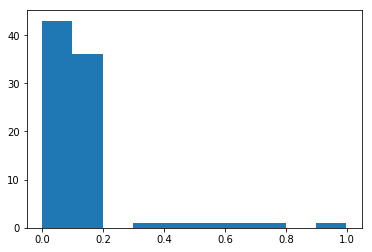

In [7]:
#make histogram showing on x-axis the percentage of missing observations at column level
#on y-axis shows the number of columns(features) with a certain percentage of missing observations 
import matplotlib.pyplot as plt
miss=np.array(missing_def_v1.iloc[6,:])
counts, bins = np.histogram(miss)
plt.hist(bins[:-1], bins, weights=counts)

#Results interpretation:
#There are 43 features with 0% missing values and 36 with percentage mising<=0.099, while there are 4 columns
#with percentage missing value greater then 0.49%
# This means that 70% of the columns have less than 20% missing values
# There are only 6 columns which have percentage of missing values %>=0.29 

#display the features with percent of missing values greater then 0.49%

columns_to_del = pd.DataFrame(np.array(missing_def_v1.iloc[6,:]).transpose())
columns_to_del.index = missing_def_v1.columns
columns_to_del.columns = ['%total_missing']
columns_to_del = columns_to_del[columns_to_del['%total_missing']>0.499]
columns_to_del

print("columns to be deleted because they have percent missing values>0.499 are: ", list(columns_to_del.index))
columns_to_del


In [9]:
missing_def_a=np.array(missing_def_v1)

# Results shows that only 4 features have more than 50% values missing (as depicted from the plot above)
miss30=[]
for i in range(missing_def_v1.shape[1]):
    if missing_def_v1.iloc[6,i]>=0.29:
        miss30.append([missing_def_v1.columns[i], missing_def_v1.iloc[6,i]])
miss30=pd.DataFrame(miss30)
miss30.columns=['feature', '%total_miss']
miss30.sort_values(['%total_miss'], ascending=False)




,feature,%total_miss
2,TITEL_KZ,0.997576
0,AGER_TYP,0.769554
4,KK_KUNDENTYP,0.655967
5,KBA05_BAUMAX,0.534687
1,GEBURTSJAHR,0.440203
3,ALTER_HH,0.348137


In [10]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# Have decided to remove features with percentage of missing values greater then 0.29 (should remove 6 features)

to_remove=list(miss30['feature'])
col=azdias_new.columns
col = col.drop(to_remove)#columns with missing values>0.29
#new dataframe exclusing the columns with percent missing values>0.29
azdias_del=azdias_new[azdias_new.columns[azdias_new.columns.isin(col)]]


In [11]:
#For the remaining features, are there any patterns in which columns have, or share, missing data?

# n_miss_del matrix has on first column the no of rows where both features have missing values,
# colums 2 and 3: name of 2 features we analyse the common missing values for
# column 4: total missing values for feature 1
# column 5: total missing values for feature 2
n_miss_del=[]
k=0

missing_del=missing_def_v1[missing_def_v1.columns[missing_def_v1.columns.isin(col)]]
m=np.array(missing_del)

for i in range(azdias_del.shape[1]-1):
    for j in range(i+1,azdias_del.shape[1]):
        s= azdias_del[azdias_del.loc[:,azdias_del.columns[i]].isin(['NaN'])]
        s = s[s.loc[:,azdias_del.columns[j]].isin(['NaN'])]    
        n_miss_del.append([s.shape[0], azdias_del.columns[i], azdias_del.columns[j],m[2,i], m[2,j], m[6,i], m[6,j] ])
        
n_miss_del=pd.DataFrame(n_miss_del)
n_miss_del.columns=['common_miss', 'feat1', 'feat2', 'Total_miss_feat1', 'Total_miss_feat2', '%miss_feat1', 
                    '%miss_feat2']
n_miss_del['%common_miss_feat1']= np.where(n_miss_del['Total_miss_feat1']>0, n_miss_del['common_miss']/n_miss_del['Total_miss_feat1'], 0)
n_miss_del['%common_miss_feat2']= np.where(n_miss_del['Total_miss_feat2']>0, n_miss_del['common_miss']/n_miss_del['Total_miss_feat2'], 0)


# Assessing which features have the strongest pair dependency
n_miss_del.sort_values(['%common_miss_feat1', '%common_miss_feat2'], ascending=False)

,common_miss,feat1,feat2,Total_miss_feat1,Total_miss_feat2,%miss_feat1,%miss_feat2,%common_miss_feat1,%common_miss_feat2
162,4854,CJT_GESAMTTYP,GFK_URLAUBERTYP,4854,4854,0.005446,0.005446,1.0,1.0
169,4854,CJT_GESAMTTYP,LP_STATUS_FEIN,4854,4854,0.005446,0.005446,1.0,1.0
170,4854,CJT_GESAMTTYP,LP_STATUS_GROB,4854,4854,0.005446,0.005446,1.0,1.0
173,4854,CJT_GESAMTTYP,RETOURTYP_BK_S,4854,4854,0.005446,0.005446,1.0,1.0
218,4854,CJT_GESAMTTYP,ONLINE_AFFINITAET,4854,4854,0.005446,0.005446,1.0,1.0
741,4854,GFK_URLAUBERTYP,LP_STATUS_FEIN,4854,4854,0.005446,0.005446,1.0,1.0
742,4854,GFK_URLAUBERTYP,LP_STATUS_GROB,4854,4854,0.005446,0.005446,1.0,1.0
745,4854,GFK_URLAUBERTYP,RETOURTYP_BK_S,4854,4854,0.005446,0.005446,1.0,1.0
790,4854,GFK_URLAUBERTYP,ONLINE_AFFINITAET,4854,4854,0.005446,0.005446,1.0,1.0
893,111196,HEALTH_TYP,SHOPPER_TYP,111196,111196,0.124768,0.124768,1.0,1.0


In [12]:
# 1. Find out number pairs with strong dependency in terms of common missing values:
n=n_miss_del.shape[0]
def dependency(val,n):
    depen=n_miss_del[(n_miss_del['%common_miss_feat1']>=val) & (n_miss_del['%common_miss_feat2']>=val)]
    n_depen=depen.shape[0]
    return(n_depen/n)
    
for i in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    print('Percentage of pairs which have ', i*100, '% dependency, is: ',round(dependency(i,n)*100,2), '%')

# Notice that there are pairs (21.74% of the pairs), where each feature tends to have half of the missing values
# whenever other features have as well
# This means that almost a quarter of the features tend to have 50% of the missing obs dependent on each other 

# Nevertheless the dependency comes from 0.6470588235294118 of the features
d=dependency(0.5,n)
depen=n_miss_del[(n_miss_del['%common_miss_feat1']>=d) & (n_miss_del['%common_miss_feat2']>=d)]
l1=list(dict.fromkeys(depen['feat1']))
l2=list(dict.fromkeys(depen['feat2']))
l=l2+l1
l=list(dict.fromkeys(l))
print(round(dependency(0.5,n)*100,2),'percent of column pairs, tend to have in common', 50,'percent of missing rows.',
      ' The features which drive this dependency represent: ', 
      len(l)/azdias_del.shape[1],' ( ',len(l), ' ) '  ' of the overall number of features left after removed columns with many missing values, which is: ',
      azdias_del.shape[1] )

Percentage of pairs which have  1.0 % dependency, is:  31.71 %
Percentage of pairs which have  5.0 % dependency, is:  31.35 %
Percentage of pairs which have  10.0 % dependency, is:  30.7 %
Percentage of pairs which have  20.0 % dependency, is:  29.8 %
Percentage of pairs which have  30.0 % dependency, is:  29.8 %
Percentage of pairs which have  40.0 % dependency, is:  28.76 %
Percentage of pairs which have  50.0 % dependency, is:  24.89 %
Percentage of pairs which have  60.0 % dependency, is:  21.19 %
Percentage of pairs which have  70.0 % dependency, is:  12.72 %
Percentage of pairs which have  80.0 % dependency, is:  7.72 %
Percentage of pairs which have  90.0 % dependency, is:  4.64 %
Percentage of pairs which have  100 % dependency, is:  2.24 %
24.89 percent of column pairs, tend to have in common 50 percent of missing rows.  The features which drive this dependency represent:  0.620253164556962  (  49  )  of the overall number of features left after removed columns with many missi

In [303]:
# Features with the largest no of common missing observations (high dependency on each other)


# 2. Find out which features in particular stand out in terms of how dependent are other 
# features on them (missing values dimension)
mean_depend=[]
for i in azdias_del.columns:
    s=n_miss_del[n_miss_del.feat1==i]
    mean_depend.append([np.mean(s['%common_miss_feat1']), i])

mean_depend=pd.DataFrame(mean_depend)
mean_depend.columns=['mean_pair_depend', 'feature_name']

mean_depend.sort_values(['mean_pair_depend'], ascending=False)  

for i in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    s=mean_depend[mean_depend.mean_pair_depend>=i]
    print('No of features which imply a mean dependency to all other features of more or equal to - ',i*100,'% is: ',s.shape[0],'. \nThey are: ' , list(dict.fromkeys(s['feature_name'])),'\n' )
    


No of features which imply a mean dependency to all other features of more or equal to -  1.0 % is:  50 . 
They are:  ['ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP', 'GFK_URLAUBERTYP', 'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S', 'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'WOHNLAGE', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT', 'ORTSGR_KLS9'] 

No of features which imply a mean dependency to all other features of

In [14]:
for i in [0.9]:
    s=mean_depend[mean_depend.mean_pair_depend>=i]
    print('No of features which imply a mean dependency to all other features of more or equal to - ',i*100,'% is: ',s.shape[0],'. \nThey are: ' , list(dict.fromkeys(s['feature_name'])),'\n' )

No of features which imply a mean dependency to all other features of more or equal to -  90.0 % is:  11 . 
They are:  ['BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'ARBEIT', 'ORTSGR_KLS9'] 



#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [301]:
# Assessing how much data is missing for each row
azdias_del_t=pd.DataFrame(np.transpose(np.array(azdias_del)))
# miss_row has on column1: the row number and on columns 2 the number of missing columns for that certain row
miss_row=np.zeros((azdias_del.shape[0],2))
miss_row[:,1]=(azdias_del_t.isnull().sum())
miss_row[:,0]=np.array(range(len(azdias_del.index)))
miss_row=pd.DataFrame(miss_row)
miss_row.columns=['row_index', 'miss_values']


histogram y-axis:  [697109  77634  12801   9533    829    155  14016   5031  28038  46075]
histogram x-axis:  [  0.    4.9   9.8  14.7  19.6  24.5  29.4  34.3  39.2  44.1  49. ]
Number of rows with missing values less than 39.2 is:  817108
Number of rows with missing values greater and equal than 39.2 is:  74113


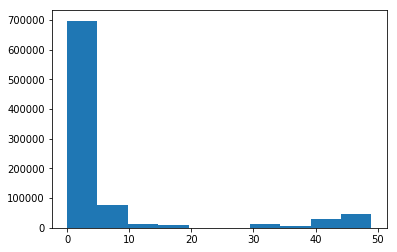

In [16]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

# Below I plot the histogram showing the number of rows split by a number of missing columns
# x-axis is the number of missing columns for a row
#y-axis is the number of rows with a certain number of missing columns
import matplotlib.pyplot as plt
miss_r=np.array(miss_row.iloc[:,1])
counts, bins = np.histogram(miss_r)
print("histogram y-axis: ",counts)
print("histogram x-axis: ",bins)
plt.hist(bins[:-1], bins, weights=counts)

#Results:
# The max number of missing values per row is 50.
# It seems that most of the rows have between 0 to 5 missing columns represnting 600,000 of rows.
# However the distribution shows there are 2 spikes for the number of missing columns per row,
# where the rows concentrate. 
# One concentration threshold is of 0 missing values per row (600,000 rows are like that)
#, while the other threshold is 39.2 missing columns per row (73,525 rows)
# Since there are a total number of 79 features left, the number of 39.2 or more missing values per each row 
# is significant(represents almost 50% of all columns).
# Hence I will consider as threshhold the value 39.2 for the total number of missing values per row.

subset_L50=azdias_del[azdias_del.index.isin(miss_row[miss_row['miss_values']<39.2]['row_index'])]
subset_G50=azdias_del[azdias_del.index.isin(miss_row[miss_row['miss_values']>=39.2]['row_index'])]

print('Number of rows with missing values less than 39.2 is: ', subset_L50.shape[0])
print('Number of rows with missing values greater and equal than 39.2 is: ', subset_G50.shape[0])

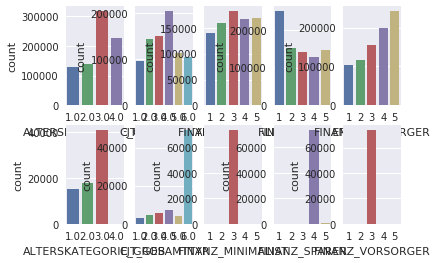

In [17]:
# Compare the distribution of values for five columns for 2 subsets;
# subset_L50 = no or few missing values , subset_G50= many missing values.

import seaborn as sns

def distrib(feature,poz):
    sns.set(style="darkgrid")
    plt.subplot(2,5,poz)
    sns.countplot(x=feature, data=subset_L50)
    plt.subplot(2,5,poz+5)
    sns.countplot(x=feature, data=subset_G50)

list_columns=['ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP','FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_VORSORGER']
#list_columns=['ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP']
for i in list_columns:
    distrib(i,list_columns.index(i)+1)
    
#Results interpretation:
#The 5 features('ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP','FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_VORSORGER') 
#chosen have a different distribution for the 2 chosen subsets, where I used as threshold lower or higher then 50% missing values. 
# The data with many missing values looks very different from the data with few or no missing values,
#then this data as special, and should not be removed from the dataset


In [147]:
# Remove rows with more then 50% missing values
azdias_del_rows_cols = subset_L50
azdias_del_rows_cols.shape

(817108, 79)

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)
Answer:

The 5 features('ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP','FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_VORSORGER') 
chosen have a different distribution for the 2 chosen subsets. To create the subsets I used as threshold the label of 50% missing values. Since the data with many missing values looks very different from the data with few or no missing values, this data is special, and should not be removed from the dataset.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [148]:
# How many features are there of each data type?

feat_info_del = feat_info[feat_info.attribute.isin(list(azdias_del_rows_cols.columns))]
feat_info_del.groupby(["type"])["attribute"].count()

#There are 18 categorical features, 6 mixed, 6 numeric and 49 ordinal


type
categorical    18
mixed           6
numeric         6
ordinal        49
Name: attribute, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [149]:

# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
recode = []
categorical_feat = (list(feat_info_del.loc[feat_info_del.type=="categorical", "attribute"]))
col = (list(azdias_del_rows_cols.columns))

for i in categorical_feat:
    subset = azdias_del_rows_cols[i]
    subset = subset.drop_duplicates()
    values = list(subset)
    if subset.shape[0]==2:
        if isinstance(sum(values),str)==False:
            recode.append([i, "binary"])
        else:
            recode.append([i, "binary-recode"])
            #values = list(map(float, values))
            for j in values:
                azdias_del_rows_cols.loc[azdias_del_rows_cols.i==j,i]=float(j)#recode non-numeric elements for binary categorical var 
    else:
        recode.append([i, "multi-level"])
        col.remove(i) #remove multi-level categorical features
        
recode = pd.DataFrame(recode)
recode.columns = ["attribute", "categorical_type"]

#see how many categorical features are binary, multi-level or need recoding
recode.groupby(["categorical_type"]).count()

#There are 3 binary categorical variables and 15 multi-level variables (features which were removed from the dataset)


,attribute
categorical_type,
binary,3
multi-level,15


In [150]:
# Re-encode categorical variable(s) to be kept in the analysis.

#remove multi-level categorical features
azdias_del_rows_cols = azdias_del_rows_cols[azdias_del_rows_cols.columns[azdias_del_rows_cols.columns.isin(col)]]

#There were no binary non-numerical categorical features hence no recoding needed 

#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

Answer:
Since I have removed rows and columns in the previous steps because of missing values, I was left with 79 features.
Out of those features , 18 were categorical features(15 multi-level, 3 binary but numeric).
I have removed the multi-level categorical features.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [163]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

#Create new variable PRAEGENDE_JUGENDJAHRE_desc which maps values of feature PRAEGENDE_JUGENDJAHRE to description from file Data_Dictionary.md
azdias_del_rows_cols["PRAEGENDE_JUGENDJAHRE_desc"]=np.nan
mapping = {1: "40s - war years (Mainstream, E+W)" 
,  2: "40s - reconstruction years (Avantgarde, E+W)"
,  3: "50s - economic miracle (Mainstream, E+W)"
,  4: "50s - milk bar / Individualisation (Avantgarde, E+W)"
,  5: "60s - economic miracle (Mainstream, E+W)"
,  6: "60s - generation 68 / student protestors (Avantgarde, W)"
,  7: "60s - opponents to the building of the Wall (Avantgarde, E)"
,  8: "70s - family orientation (Mainstream, E+W)"
,  9: "70s - peace movement (Avantgarde, E+W)"
, 10: "80s - Generation Golf (Mainstream, W)"
, 11: "80s - ecological awareness (Avantgarde, W)"
, 12: "80s - FDJ / communist party youth organisation (Mainstream, E)"
, 13: "80s - Swords into ploughshares (Avantgarde, E)"
, 14: "90s - digital media kids (Mainstream, E+W)"
, 15: "90s - ecological awareness (Avantgarde, E+W)"}

for i in mapping.keys():
    azdias_del_rows_cols.loc[azdias_del_rows_cols.PRAEGENDE_JUGENDJAHRE==i,"PRAEGENDE_JUGENDJAHRE_desc"]=mapping[i]
    
azdias_del_rows_cols.loc[azdias_del_rows_cols.PRAEGENDE_JUGENDJAHRE.isin(['NaN']),"PRAEGENDE_JUGENDJAHRE_desc"]="unknown"

decade = {'40':"40-49",'50':"50-59",'60':"60-69",'70':"70-79",'80':"80-89",'90':"90-99", "unknown":"unknown"}

mapping_to_decade={}
mapping_to_movement = {}
no_dupl = list(azdias_del_rows_cols.PRAEGENDE_JUGENDJAHRE_desc.drop_duplicates())
for j in no_dupl:
    mapping_to_decade[j]=decade[j.split("s - ")[0]]

for j in no_dupl:
    if j!="unknown":
        mapping_to_movement[j]=j.split("(")[1].split(",")[0]
    else:
        mapping_to_movement[j]=np.nan
        
azdias_del_rows_cols.decade = np.nan
azdias_del_rows_cols.movement = np.nan

for i in mapping_to_decade.keys():
    azdias_del_rows_cols.loc[azdias_del_rows_cols.PRAEGENDE_JUGENDJAHRE_desc==i,"decade"]=mapping_to_decade[i]
    
for i in mapping_to_movement.keys():
    azdias_del_rows_cols.loc[azdias_del_rows_cols.PRAEGENDE_JUGENDJAHRE_desc==i,"movement"]=mapping_to_movement[i]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [152]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias_del_rows_cols.wealth = np.nan
azdias_del_rows_cols.life_stage = np.nan
no_dupl = list(azdias_del_rows_cols.CAMEO_INTL_2015.drop_duplicates())
mapping_wealth = {}
mapping_life_status = {}
for i in no_dupl:
    mapping_wealth[i] = (str(i)[0])
    mapping_life_status[i] = (str(i)[1])
for i in mapping_wealth.keys():
    azdias_del_rows_cols.loc[azdias_del_rows_cols.CAMEO_INTL_2015==i,"wealth"]=mapping_wealth[i]
for i in mapping_life_status.keys():
    azdias_del_rows_cols.loc[azdias_del_rows_cols.CAMEO_INTL_2015==i,"life_status"]=mapping_life_status[i]
azdias_del_rows_cols.loc[azdias_del_rows_cols.CAMEO_INTL_2015.isin(['NaN']),"wealth"]=np.nan
azdias_del_rows_cols.loc[azdias_del_rows_cols.CAMEO_INTL_2015.isin(['NaN']),"life_status"]=np.nan

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

Answer: I have decided to keep PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 from the mixed features.
From CAMEO_INTL_2015 I created 2 dictionaries mapping_wealth which maps each distinct value of CAMEO_INTL_2015 to first digit of that value and mapping_life_status: which maps each distinct value of CAMEO_INTL_2015 to second digit of that number. 
Using first dictionary I loop across all the keys and for all rows from column:CAMEO_INTL_2015 equal to that key I paste the dictionary value for that key into the new column wealth.
Using second dictionary I loop across all keys and for all rows from column: CAMEO_INTL_2015 equal to a key I paste the dictionary value for that key into the new column life_status.
When CAMEO_INTL_2015 has missing values, life_status and wealth features have missing value as well.

From PRAEGENDE_JUGENDJAHRE I have created 2 dictionaries:
- mapping_to_movement: which maps each distinct value of PRAEGENDE_JUGENDJAHRE to the text obtained by splitting each value of PRAEGENDE_JUGENDJAHRE first by character "(" and taking second element of the list, and splitting this element again by character "," and taking first element of the list.
- mapping_to_decade: which maps each dictinct value of PRAEGENDE_JUGENDJAHRE to the text obtained by splitting over character "s -" and take first element.

I also create a dictionary decade which maps the decade values(e.g 40, 50, 60 etc) to an interval variable having lower bound the decade and higher bound the decade +9 years.(e.g. 40-49, 50-59, 60-69 etc).

Using mapping_to_movement dictionary, I loop over the dictionary keys and for all rows of column PRAEGENDE_JUGENDJAHRE equal to that key I paste into new column movement the value assigned for that key.

Using mapping_to_decade dictionary, I loop over the dictionary keys and for all rows of column PRAEGENDE_JUGENDJAHRE equal to that key I paste into new column: decade the value assigned for that key. Moreover the new column decade has attached the value from dictionary decade for each value assigned in the previous step.


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [153]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

In [176]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

# remove original mixed columns I used to engineer new variables:
col=list(azdias_del_rows_cols.columns)
col.remove("CAMEO_INTL_2015")
col.remove("PRAEGENDE_JUGENDJAHRE")
col.remove("PRAEGENDE_JUGENDJAHRE_desc")

#new dataset after removing original mixed columns
azdias_post_encoding = azdias_del_rows_cols[azdias_del_rows_cols.columns[azdias_del_rows_cols.columns.isin(col)]]

#add dummies for binary variables and newly created variables
categorical_feat = recode[recode.categorical_type=="binary"]
categorical_feat = list(categorical_feat["attribute"])
categorical_feat.append("decade")
categorical_feat.append("movement")
categorical_feat.append("wealth")
categorical_feat.append("life_status")

for i in categorical_feat:
    azdias_post_encoding = pd.get_dummies(azdias_post_encoding, columns=[i])

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'decade', 'movement', 'wealth', 'life_status']


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [197]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    def isfloat(value):
      try:
        float(value)
        return True
      except ValueError:
        return False

    for i in range(df.shape[1]):
        m=list(feat_info[feat_info['attribute']==feat_info['attribute'][i]]['missing_or_unknown'])
        m1=(m[0])
        l= [x.strip("[]") for x in m1.split(',')]
        ll=l
        for j in range(len(l)):
            if isfloat(l[j]):
                ll[j]=int(l[j])
        df=df.replace({df.columns[i]: l}, {df.columns[i]: np.nan}, regex=True)
        del l, ll
    
    # remove selected columns and rows, ...
    missing_def=np.empty((8,df.shape[1]),dtype=object)
    for i in range(df.shape[1]):
        g=df[df.loc[:,df.columns[i]].isin(['NaN'])]
        g_new=df[df.loc[:,df.columns[i]].isin(['NaN'])]
        missing_def[1,i]=g.shape[0] # count number of observations naturally missing
        missing_def[0,i]=df.columns[i]
        missing_def[3,i]=g_new.shape[0]#sum, per feature, the number of naturally missing obs with number of those labeled missing or unknown
    missing_def[2,:]=missing_def[3,:]-missing_def[1,:]# count number of observations , per feature, which fit in label missing or unknown
    missing_def[4,:]=df.shape[0]*np.ones(df.shape[1])#no obs per feature
    missing_def[5,:]=missing_def[1,:]/missing_def[4,:]#percent of obs naturally missing
    missing_def[6,:]=missing_def[2,:]/missing_def[4,:]#percent of obs labelled as missing or unknown
    missing_def[7,:]=missing_def[3,:]/missing_def[4,:]#percent of obs missing 
    
    missing_def_v1=pd.DataFrame(missing_def[1:8,:])
    missing_def_v1.columns=missing_def[0,:]
    missing_def_v1.index=['Def_miss', 'Map_miss', 'Total_miss', 'No_obs', '%def_miss', '%map_miss', '%total_miss']


    print("columns to be deleted because they have percent missing values>0.499 are: ", list(columns_to_del.index))

    miss30=[]
    for i in range(missing_def_v1.shape[1]):
        if missing_def_v1.iloc[6,i]>=0.29:
            miss30.append([missing_def_v1.columns[i], missing_def_v1.iloc[6,i]])
    miss30=pd.DataFrame(miss30)
    miss30.columns=['feature', '%total_miss']
    miss30.sort_values(['%total_miss'], ascending=False)

    #to_remove=list(miss30['feature'])
    col=df.columns
    col = col.drop(to_remove)#columns with missing values>0.29
    #new dataframe exclusing the columns with percent missing values>0.29
    df=df[df.columns[df.columns.isin(col)]]
    
    # Assessing how much data is missing for each row
    df_t=pd.DataFrame(np.transpose(np.array(df)))
    # miss_row has on column1: the row number and on columns 2 the number of missing columns for that certain row
    miss_row=np.zeros((df.shape[0],2))
    miss_row[:,1]=(df_t.isnull().sum())
    miss_row[:,0]=np.array(range(len(df.index)))
    miss_row=pd.DataFrame(miss_row)
    miss_row.columns=['row_index', 'miss_values']
    
    
    df=df[df.index.isin(miss_row[miss_row['miss_values']<39.2]['row_index'])]

    # select, re-encode, and engineer column values.
    categorical_feat = (list(feat_info_del.loc[feat_info_del.type=="categorical", "attribute"]))
    recode = []
    col = (list(df.columns))
    for i in categorical_feat:
        subset = df[i]
        subset = subset.drop_duplicates()
        values = list(subset)
        if subset.shape[0]==2:
            if isinstance(sum(values),str)==False:
                recode.append([i, "binary"])
            else:
                recode.append([i, "binary-recode"])
            #values = list(map(float, values))
                for j in values:
                    df.loc[df.i==j,i]=float(j)#recode non-numeric elements for binary categorical var 
        else:
            recode.append([i, "multi-level"])
            col.remove(i) #remove multi-level categorical features
            
    recode = pd.DataFrame(recode)
    recode.columns = ["attribute", "categorical_type"]
            
    #remove multi-level categorical features
    df = df[df.columns[df.columns.isin(col)]]

    #Create new variable PRAEGENDE_JUGENDJAHRE_desc which maps values of feature PRAEGENDE_JUGENDJAHRE to description from file Data_Dictionary.md
    df["PRAEGENDE_JUGENDJAHRE_desc"]=np.nan
    for i in mapping.keys():
        df.loc[df.PRAEGENDE_JUGENDJAHRE==i,"PRAEGENDE_JUGENDJAHRE_desc"]=mapping[i]
    
    df.loc[df.PRAEGENDE_JUGENDJAHRE.isin(['NaN']),"PRAEGENDE_JUGENDJAHRE_desc"]="unknown"        
    df.decade = np.nan
    df.movement = np.nan
    for i in mapping_to_decade.keys():
        df.loc[df.PRAEGENDE_JUGENDJAHRE_desc==i,"decade"]=mapping_to_decade[i] 
    for i in mapping_to_movement.keys():
        df.loc[df.PRAEGENDE_JUGENDJAHRE_desc==i,"movement"]=mapping_to_movement[i]

    df.wealth = np.nan
    df.life_stage = np.nan
    no_dupl = list(df.CAMEO_INTL_2015.drop_duplicates())
    for i in mapping_wealth.keys():
        df.loc[df.CAMEO_INTL_2015==i,"wealth"]=mapping_wealth[i]
    for i in mapping_life_status.keys():
        df.loc[df.CAMEO_INTL_2015==i,"life_status"]=mapping_life_status[i]
    df.loc[df.CAMEO_INTL_2015.isin(['NaN']),"wealth"]=np.nan
    df.loc[df.CAMEO_INTL_2015.isin(['NaN']),"life_status"]=np.nan
    
    # remove original mixed columns I used to engineer new variables:
    col = list(df.columns)
    col.remove("CAMEO_INTL_2015")
    col.remove("PRAEGENDE_JUGENDJAHRE")
    col.remove("PRAEGENDE_JUGENDJAHRE_desc")
    
    #new dataset after removing original mixed columns
    df = df[df.columns[df.columns.isin(col)]]

    #add dummies for binary variables and newly created variables
    categorical_feat = recode[recode.categorical_type=="binary"]
    categorical_feat = list(categorical_feat["attribute"])
    categorical_feat.append("decade")
    categorical_feat.append("movement")
    categorical_feat.append("wealth")
    categorical_feat.append("life_status")

    for i in categorical_feat:
        df = pd.get_dummies(df, columns=[i])

    # Return the cleaned dataframe.
    return df

In [204]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    def isfloat(value):
      try:
        float(value)
        return True
      except ValueError:
        return False

    for i in range(df.shape[1]):
        m=list(feat_info[feat_info['attribute']==feat_info['attribute'][i]]['missing_or_unknown'])
        m1=(m[0])
        l= [x.strip("[]") for x in m1.split(',')]
        ll=l
        for j in range(len(l)):
            if isfloat(l[j]):
                ll[j]=int(l[j])
        df=df.replace({df.columns[i]: l}, {df.columns[i]: np.nan}, regex=True)
        del l, ll


    #to_remove=list(miss30['feature'])
    col=df.columns
    col = col.drop(to_remove)#columns with missing values>0.29
    #new dataframe exclusing the columns with percent missing values>0.29
    df=df[df.columns[df.columns.isin(col)]]
    
    # Assessing how much data is missing for each row
    df_t=pd.DataFrame(np.transpose(np.array(df)))
    # miss_row has on column1: the row number and on columns 2 the number of missing columns for that certain row
    miss_row=np.zeros((df.shape[0],2))
    miss_row[:,1]=(df_t.isnull().sum())
    miss_row[:,0]=np.array(range(len(df.index)))
    miss_row=pd.DataFrame(miss_row)
    miss_row.columns=['row_index', 'miss_values']
    
    
    df=df[df.index.isin(miss_row[miss_row['miss_values']<39.2]['row_index'])]

    # select, re-encode, and engineer column values.
    categorical_feat = (list(feat_info_del.loc[feat_info_del.type=="categorical", "attribute"]))
    recode = []
    col = (list(df.columns))
    for i in categorical_feat:
        subset = df[i]
        subset = subset.drop_duplicates()
        values = list(subset)
        if subset.shape[0]==2:
            if isinstance(sum(values),str)==False:
                recode.append([i, "binary"])
            else:
                recode.append([i, "binary-recode"])
            #values = list(map(float, values))
                for j in values:
                    df.loc[df.i==j,i]=float(j)#recode non-numeric elements for binary categorical var 
        else:
            recode.append([i, "multi-level"])
            col.remove(i) #remove multi-level categorical features
            
    recode = pd.DataFrame(recode)
    recode.columns = ["attribute", "categorical_type"]
            
    #remove multi-level categorical features
    df = df[df.columns[df.columns.isin(col)]]

    #Create new variable PRAEGENDE_JUGENDJAHRE_desc which maps values of feature PRAEGENDE_JUGENDJAHRE to description from file Data_Dictionary.md
    df["PRAEGENDE_JUGENDJAHRE_desc"]=np.nan
    for i in mapping.keys():
        df.loc[df.PRAEGENDE_JUGENDJAHRE==i,"PRAEGENDE_JUGENDJAHRE_desc"]=mapping[i]
    
    df.loc[df.PRAEGENDE_JUGENDJAHRE.isin(['NaN']),"PRAEGENDE_JUGENDJAHRE_desc"]="unknown"        
    df.decade = np.nan
    df.movement = np.nan
    for i in mapping_to_decade.keys():
        df.loc[df.PRAEGENDE_JUGENDJAHRE_desc==i,"decade"]=mapping_to_decade[i] 
    for i in mapping_to_movement.keys():
        df.loc[df.PRAEGENDE_JUGENDJAHRE_desc==i,"movement"]=mapping_to_movement[i]

    df.wealth = np.nan
    df.life_stage = np.nan
    no_dupl = list(df.CAMEO_INTL_2015.drop_duplicates())
    for i in mapping_wealth.keys():
        df.loc[df.CAMEO_INTL_2015==i,"wealth"]=mapping_wealth[i]
    for i in mapping_life_status.keys():
        df.loc[df.CAMEO_INTL_2015==i,"life_status"]=mapping_life_status[i]
    df.loc[df.CAMEO_INTL_2015.isin(['NaN']),"wealth"]=np.nan
    df.loc[df.CAMEO_INTL_2015.isin(['NaN']),"life_status"]=np.nan
    
    # remove original mixed columns I used to engineer new variables:
    col = list(df.columns)
    col.remove("CAMEO_INTL_2015")
    col.remove("PRAEGENDE_JUGENDJAHRE")
    col.remove("PRAEGENDE_JUGENDJAHRE_desc")
    
    #new dataset after removing original mixed columns
    df = df[df.columns[df.columns.isin(col)]]

    #add dummies for binary variables and newly created variables
    categorical_feat = recode[recode.categorical_type=="binary"]
    categorical_feat = list(categorical_feat["attribute"])
    categorical_feat.append("decade")
    categorical_feat.append("movement")
    categorical_feat.append("wealth")
    categorical_feat.append("life_status")

    for i in categorical_feat:
        df = pd.get_dummies(df, columns=[i])

    # Return the cleaned dataframe.
    return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [182]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

#check how many rows and columns I lose if I remove all missing values rather than using imputer
azdias_for_scaling = azdias_post_encoding.dropna()
print("After removing missing value, left with: ",azdias_for_scaling.shape[0], " rows, and ", azdias_for_scaling.shape[1], " columns")
print("We lost ",round(( azdias_post_encoding.shape[0]/azdias_for_scaling.shape[0]-1)*100,2), "% of rows, and ", azdias_post_encoding.shape[1]/azdias_for_scaling.shape[1]-1, " columns.")


#Since we lose 29% of rows if remove missing values, I have decided to do the feature scaling on the dataset without missing values and use an imputer to replace missing values with the mean 


After removing missing value, left with:  632124  rows, and  84  columns
We lost  29.26 % of rows, and  0.0  columns.


In [183]:
# Apply feature scaling to the general population demographics data.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(azdias_for_scaling))#create mean and standard deviation per column using the dataset without missing values
azdias_post_impute = azdias_post_encoding.apply(lambda x: x.fillna(x.mean()),axis=0)#replace missing values with the median per column
azdias_scaled = pd.DataFrame(scaler.transform(azdias_post_impute))
azdias_scaled.columns = azdias_post_encoding.columns


### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)
I have decided not to remove missing values from the dataset, since this would imply loosing 29% of the rows.
Instead I have used StandardScaler to create mean and standard dev using the dataset without the missing values and apply it to standardise the the initial dataset, where I have replaced the missing values with the mean per column.


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [185]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
X = np.array(azdias_scaled)
pca = PCA()#all components are computed
pca.fit(X)



PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Since 80% of the variance is explained by 20 components, I will select no_components for PCA =20


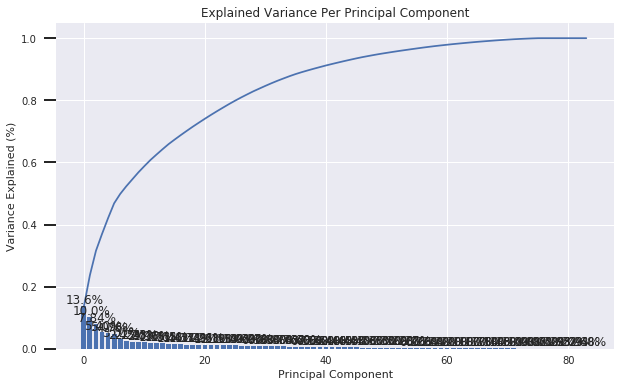

In [186]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

print("Since 80% of the variance is explained by 20 components, I will select no_components for PCA =20")


In [187]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=20)#select 20 components since they explain 80% of the variance
pca.fit(X)
#pca.fit_transform(X)
components = pca.transform(X)

print(pca.explained_variance_ratio_)

[ 0.13635842  0.1008923   0.07842121  0.05403615  0.05098944  0.04763467
  0.0301652   0.02457335  0.02240822  0.02233424  0.02037114  0.01962571
  0.01751942  0.0171094   0.01649588  0.01460379  0.01414962  0.0137233
  0.0134694   0.01288417]


### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

Answer:
I applied PCA  to rescaled dataset using no parameters (all components were generated)and plotted the variance explained by each component. Noticed that first 20 components explain 80% of variance and decided to re-apply PCA to the dataset while using only 20 components.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [188]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def sort_features(df, row, no_comp):
    """Inputs:
    -df = array containing on each row the weights for each component
    -row = the component row number: e.g. if want first component need to input 0
    no_comp = number of components selected for PCA 
    """
    weights = pd.DataFrame()
    weights["weight"] = df[row,:]
    weights["weight_abs"] = abs(weights["weight"]) #absolute value of the weight of each feature
    weights["feature"] = azdias_scaled.columns[0:no_comp]#name of feature
    weights = weights.sort_values(by=['weight_abs'], ascending=False)#I sorted based on absolute value of the weight
    return weights

sort_features(components, 0, 20)

,weight,weight_abs,feature
9,14.340485,14.340485,LP_LEBENSPHASE_GROB
8,5.594081,5.594081,LP_LEBENSPHASE_FEIN
0,3.612578,3.612578,ALTERSKATEGORIE_GROB
2,-3.174959,3.174959,FINANZ_SPARER
7,3.132171,3.132171,HEALTH_TYP
1,-2.895674,2.895674,FINANZ_MINIMALIST
19,-1.520584,1.520584,SEMIO_RAT
4,-1.413164,1.413164,FINANZ_ANLEGER
18,-1.319220,1.319220,SEMIO_KULT
16,1.037284,1.037284,SEMIO_LUST


In [189]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
sort_features(components, 1, 20)


,weight,weight_abs,feature
3,3.523574,3.523574,FINANZ_VORSORGER
6,-2.842576,2.842576,FINANZ_HAUSBAUER
2,-2.755253,2.755253,FINANZ_SPARER
13,-1.906753,1.906753,SEMIO_REL
11,-1.802859,1.802859,SEMIO_SOZ
17,-1.554185,1.554185,SEMIO_ERL
16,1.300278,1.300278,SEMIO_LUST
15,1.290767,1.290767,SEMIO_VERT
0,-0.927038,0.927038,ALTERSKATEGORIE_GROB
7,-0.690656,0.690656,HEALTH_TYP


In [190]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
sort_features(components, 2, 20)


,weight,weight_abs,feature
0,-4.037187,4.037187,ALTERSKATEGORIE_GROB
3,-2.265080,2.265080,FINANZ_VORSORGER
15,-1.830714,1.830714,SEMIO_VERT
18,-1.815954,1.815954,SEMIO_KULT
17,1.785611,1.785611,SEMIO_ERL
1,1.682711,1.682711,FINANZ_MINIMALIST
5,1.408825,1.408825,FINANZ_UNAUFFAELLIGER
10,-1.379930,1.379930,RETOURTYP_BK_S
2,-1.257561,1.257561,FINANZ_SPARER
12,-1.040236,1.040236,SEMIO_FAM


### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

Answer:
All 3 components revolve around a small set of features: FINANZ_SPARER, FINANZ_HAUSBAUER, ALTERSKATEGORIE_GROB. when assigning the largest or smallest weights in absolute terms. 
First component has the:
- highest positive weights towards: LP_LEBENSPHASE_GROB and LP_LEBENSPHASE_FEIN both representing life stage and ALTERSKATEGORIE_GROB(age), 
- largest negative weights for: FINANZ_SPARER(money saver) and FINANZ_MINIMALIST(low financial interest). 
- smallest weights are towards: SEMIO_SOZ(socially minded), FINANZ_HAUSBAUER(home ownership)

Second component has :
- highest pos weights for: FINANZ_VORSORGER(financially prepared), 
- largest negative weights for: FINANZ_HAUSBAUER(home ownership) , FINANZ_SPARER(money saver)
- smallest weights are for: SEMIO_KULT(cultural minded) and LP_LEBENSPHASE_GROB(life stage)

Third component has:
- highest positive weight for: SEMIO_ERL(event_orientation), FINANZ_MINIMALIST(low financial interest)
- largest negative weight for: ALTERSKATEGORIE_GROB(age) and FINANZ_VORSORGER(financial preparedness), SEMIO_VERT(dreamful)
- The smallest weights are for: SEMIO_SOZ(socially minded), SEMIO_MAT(materialistic), SEMIO_RAT(rational)

First 2 components seem to be complementary, while the first one describes a consumer which is in an early stage of his life, with no home ownership , and interest in saving, the second component is meant to capture a more mature customer already established possibly a home owner with significant savings. Last but not least the third component captures a customer which is rather young a dreamer with no inclunations towards materialistic or rational behaviour.


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

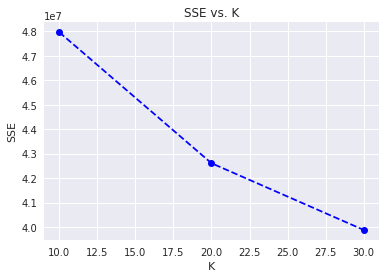

In [191]:
# Over a number of different cluster counts...


    # run k-means clustering on the data and...
    
from sklearn.cluster import KMeans    
    # compute the average within-cluster distances.
    
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    #the scores measure how far are the points from the centroid
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(10,31,10))

for center in centers:
    scores.append(get_kmeans_score(X, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [193]:

# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.


In [194]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# Try instantiating a model with 22 centers
kmeans_22 = KMeans(n_clusters=22)

# Then fit the model to your data using the fit method
model_22 = kmeans_22.fit(X)

# Finally predict the labels on the same data to show the category that point belongs to
labels_22 = model_22.predict(X)


### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

I have decided to segment the population into 22 clusters based on the the scree plot.
The screen plot works the following way: Each time additional centers are considered, the distances between the points and the center will decrease. However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.
Once you have fit a kmeans model to some data in sklearn, there is a score method, which takes the data. This score is an indication of how far the points are from the centroids. By fitting models for centroids from 20-30, and keeping track of the score and the number of centroids, I was able to build a scree plot.
This plot has the number of centroids on the x-axis, and the absolute value of the score result on the y-axis. 

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [195]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',';')

In [214]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_clean = clean_data(customers)#Apply cleaning function

customers_clean = customers_clean.apply(lambda x: x.fillna(x.mean()),axis=0)#replace missing values with the median per column

customers_scaled = pd.DataFrame(scaler.transform(customers_clean))#apply feature transformation
customers_scaled.columns = customers_clean.columns
customers_pca = pca.transform(np.array(customers_scaled))

customers_labels_22 = model_22.predict(customers_scaled)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

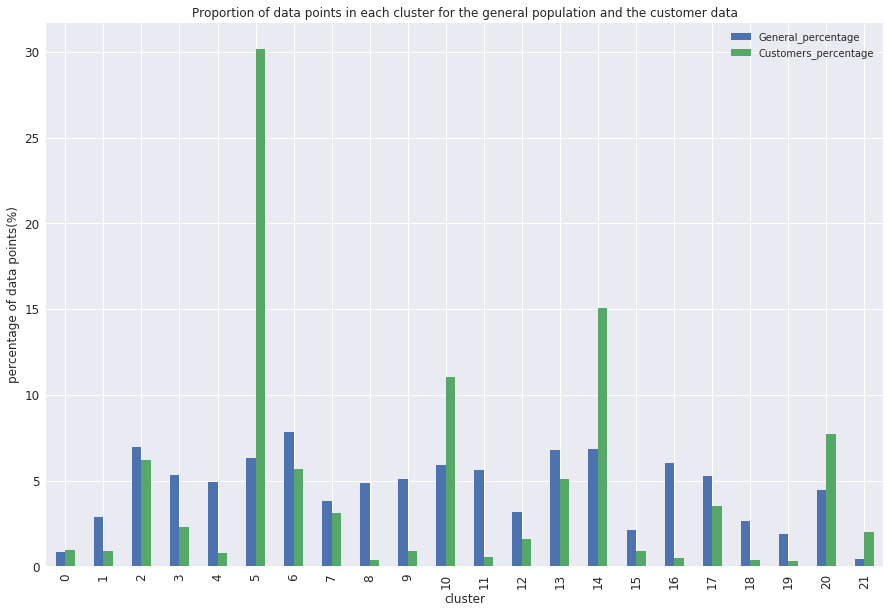

In [233]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
general_labels = list(labels_22)
customers_labels = list(customers_labels_22)
clusters = list(dict.fromkeys(general_labels))

count_general = {i:general_labels.count(i) for i in clusters}

count_customers = {i:customers_labels.count(i) for i in clusters}

prop = []
for i in clusters:
    prop.append([clusters.index(i), round(count_general[i]/len(general_labels)*100,2),round(count_customers[i]/len(customers_labels)*100,2)])

prop=pd.DataFrame(prop)
prop.columns = ["Cluster","General_percentage", "Customers_percentage"]

import matplotlib.pyplot as plt
ax = prop[['General_percentage','Customers_percentage']].plot(kind='bar', title ="Proportion of data points in each cluster for the general population and the customer data", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("cluster", fontsize=12)
ax.set_ylabel("percentage of data points(%)", fontsize=12)
plt.show()

Cluster 5 distribution for feature:  ALTERSKATEGORIE_GROB  : 
 ALTERSKATEGORIE_GROB
-1.755011     82
-0.782532     43
 0.189947     43
 1.162426    276
Name: ALTERSKATEGORIE_GROB, dtype: int64 

Cluster 16 distribution for feature:  ALTERSKATEGORIE_GROB  : 
 ALTERSKATEGORIE_GROB
-1.755011    342
-0.782532    364
 0.189947    101
 0.662633      2
 1.162426      1
Name: ALTERSKATEGORIE_GROB, dtype: int64 

Cluster 5 distribution for feature:  FINANZ_MINIMALIST  : 
 FINANZ_MINIMALIST
-1.517541    164
-0.780541    104
-0.043540    136
 0.693461     37
 1.430462      3
Name: FINANZ_MINIMALIST, dtype: int64 

Cluster 16 distribution for feature:  FINANZ_MINIMALIST  : 
 FINANZ_MINIMALIST
-1.517541    393
-0.780541    320
-0.043540     89
 0.693461      8
Name: FINANZ_MINIMALIST, dtype: int64 

Cluster 5 distribution for feature:  FINANZ_SPARER  : 
 FINANZ_SPARER
-1.129939    248
-0.449727     29
 0.230485      1
 0.910697     36
 1.590910    130
Name: FINANZ_SPARER, dtype: int64 

Cluster 16 

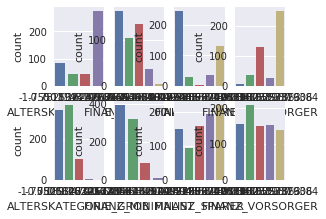

In [300]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

#The cluster number 5,10, 14 , 20 and 21 is overrepresented in the customer data compared to the general population.
#There is a higher proportion of persons in these clusters for the customer data compared to the general population 
#(e.g. 6% of persons are assigned to a cluster 5 for the general population, but 30% of the customer data is closest 
# to that cluster's centroid). Hence people in these clusters are the target audience for the company. 

#In part 1.1.3 I have splitted the general population in 2 subsets based on the missing level of information(no or few missing rows and many missing rows)
#Then I have tested the distribution of 5 features:'ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP'(removed during cleaning and scaling),'FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_VORSORGER'
#across these 2 subsets and for all columns I saw a different distribution, meaning these features are signioficant.

customers_scaled["labels"]= customers_labels_22
customers_cluster5 = customers_scaled[customers_scaled.labels ==5]
customers_cluster16 = customers_scaled[customers_scaled.labels ==16]


import seaborn as sns

def distrib_customers(feature,poz):
    sns.set(style="darkgrid")
    plt.subplot(2,5,poz)
    plt.subplots_adjust(bottom=0.3, right=0.8, top=0.9)
    sns.countplot(x=feature, data=customers_cluster5)
    plt.subplot(2,5,poz+5)
    sns.countplot(x=feature, data=customers_cluster16)

list_columns=['ALTERSKATEGORIE_GROB', 'FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_VORSORGER']

for i in list_columns:
    print("Cluster 5 distribution for feature: ",i," : \n",customers_cluster5.groupby([i])[i].count(),"\n")
    print("Cluster 16 distribution for feature: ",i," : \n",customers_cluster16.groupby([i])[i].count(),"\n")
    distrib_customers(i,list_columns.index(i)+1)
    
print("The target customers for customers dataset are: older people with low financial interest, who have savings and low financial be prepared variable")

In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

#Using data from previous analysis made in cell from above, cluster 16 is heavily underrepresented in customer data comoared to general population.
#These people are younger, with low financial interest, low saving behaviour


### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

Answer:
The cluster number 5,10, 14 , 20 and 21 is overrepresented in the customer data compared to the general population.
There is a higher proportion of persons in these clusters for the customer data compared to the general population 
(e.g. 6% of persons are assigned to a cluster 5 for the general population, but 30% of the customer data is closest to that cluster's centroid). Hence people in these clusters are the target audience for the company. 
Comparing the distribution across 4 features:'ALTERSKATEGORIE_GROB', 'FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_VORSORGER'(features which proved significant in section 1.1.3 when I compared dataset with few missing rows versus many rows) for the subset of customers with cluster 5 versus 16, I found that the target customers for customers dataset are: older people with low financial interest, who have savings and low financial - be prepared variable.
These same features:'ALTERSKATEGORIE_GROB', 'FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_VORSORGER' proved to have high weights in the first 3 principal components as well.
Meanwhile cluster 16 is heavily underrepresented in data. These people are younger, with low financial interest, low saving behaviour.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.